<a href="https://colab.research.google.com/github/Bhuvi237/Titanic_dataset_task2/blob/main/titanic_dataset_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading csv dataset into pandas dataframe
data=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Dataframe info like each label datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Finding no.of missing values in each column
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Handling missing values
data=data.drop(columns='Cabin',axis=1)
#Replacing missing values with mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

/tmp/ipython-input-1290058883.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


In [ ]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(data['Embarked'].mode()[0])

S


In [ ]:
#Replacing missing values with mode
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data.isnull().sum()

/tmp/ipython-input-262614522.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#getting statistical measures
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


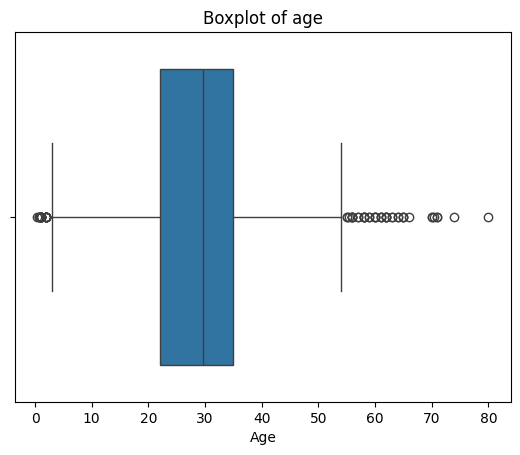

In [ ]:
sns.boxplot(x=data['Age'])
plt.title('Boxplot of age')
plt.show()

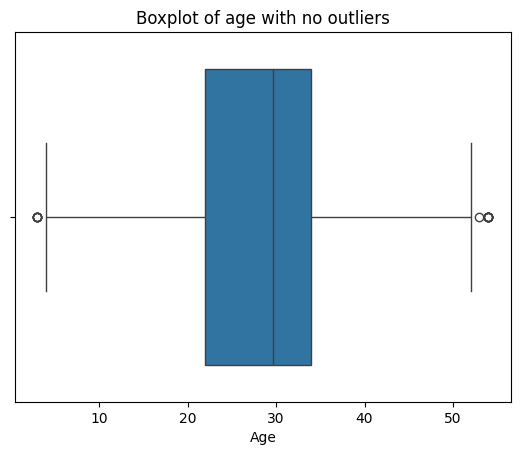

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
Age_no_outliers = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

sns.boxplot(x=Age_no_outliers['Age'])
plt.title('Boxplot of age with no outliers')
plt.show()

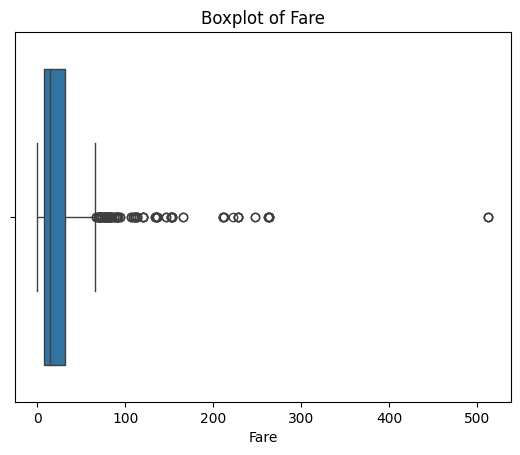

In [ ]:
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

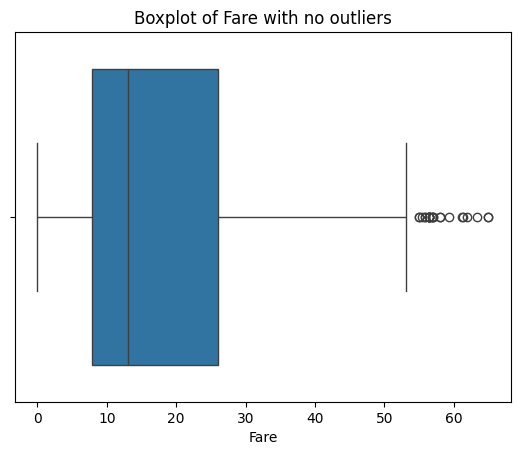

In [ ]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
Fare_no_outliers = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]
sns.boxplot(x=Fare_no_outliers['Fare'])
plt.title('Boxplot of Fare with no outliers')
plt.show()

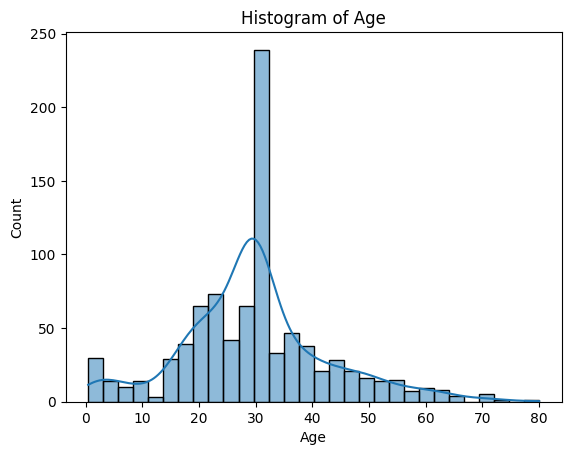

In [ ]:
sns.histplot(data['Age'], kde=True)
plt.title("Histogram of Age")
plt.show()

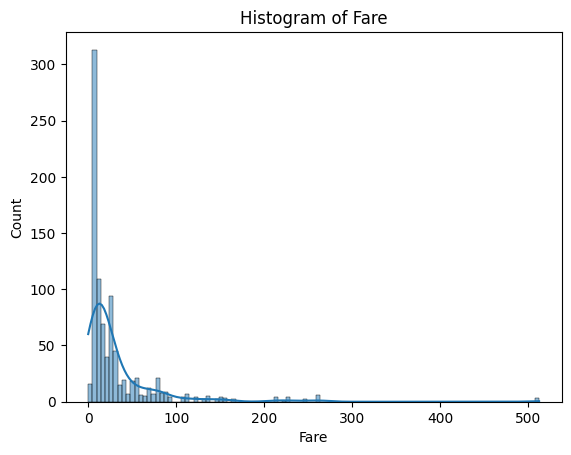

In [ ]:
sns.histplot(data['Fare'], kde=True)
plt.title("Histogram of Fare")
plt.show()

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.331339  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.084153  0.114631   
Age             0.033207 -0.069809 -0.331339 -0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.091566  0.159651   
Embarked       -0.030467  0.106811  0.045702  0.116569  0.007461 -0.059961   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030467  
Survived     0.081629  0.257307  0.106811  
Pclass       0.018443 -0.549500  0.045702  
Sex          0.245489  0.182333  0.116569  

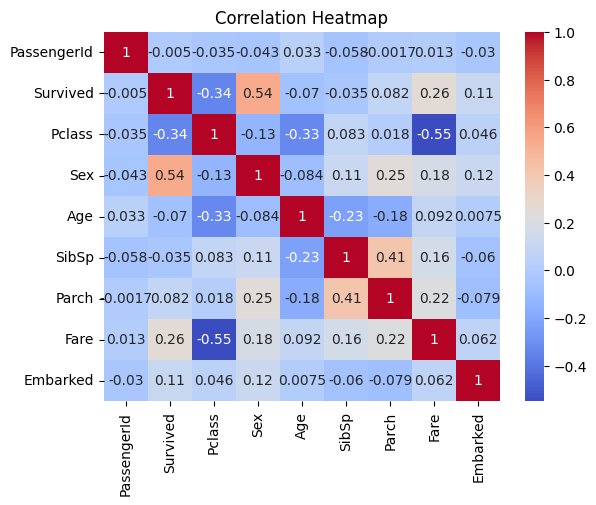

In [ ]:
corr_matrix = data.corr(numeric_only=True)

# Print the correlation matrix (just numbers)
print(corr_matrix)

# Now visualize it
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

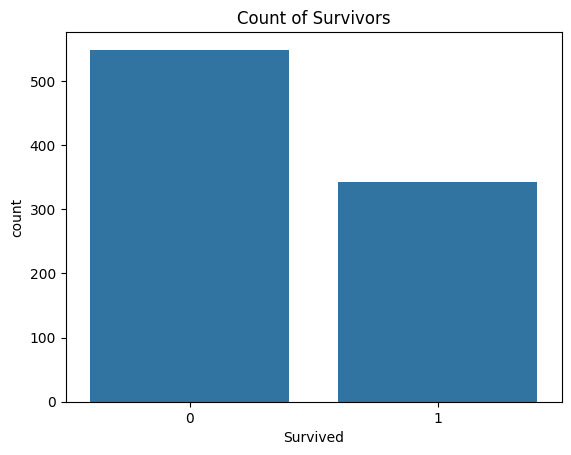

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of survivors and non survivors
sns.countplot(x=data['Survived'])
plt.title('Count of Survivors')
plt.show()


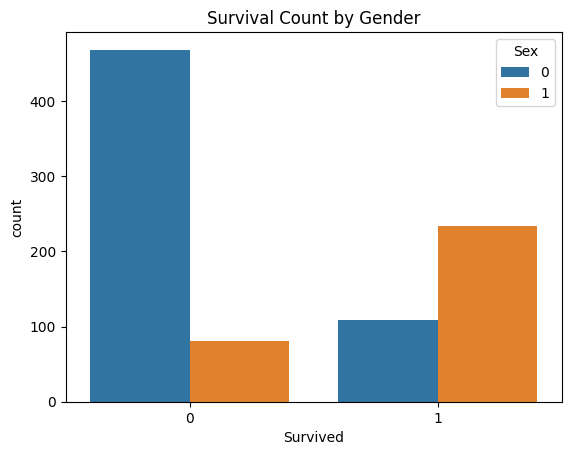

In [ ]:
sns.countplot(x=data['Survived'], hue=data['Sex'])
plt.title('Survival Count by Gender')
plt.show()
